In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("--- Step 1: Loading and Preprocessing MNIST Data ---")
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train_norm = x_train.astype('float32') / 255.
x_test_norm = x_test.astype('float32') / 255.

# Add a channel dimension (for grayscale images, this is 1)
x_train_norm = np.expand_dims(x_train_norm, axis=-1)
x_test_norm = np.expand_dims(x_test_norm, axis=-1)

print(f"Data loaded. Training data shape: {x_train_norm.shape}")


--- Step 1: Loading and Preprocessing MNIST Data ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Data loaded. Training data shape: (60000, 28, 28, 1)


In [3]:
latent_dim = 2  # The compressed latent space will be 2-dimensional

# --- Encoder ---
input_img = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(input_img)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
# Shape is now (7, 7, 64)
x = layers.Flatten()(x)
encoded = layers.Dense(latent_dim, name="latent_space", activation='relu')(x)

# --- Decoder ---
# This part reconstructs the image from the latent space
x_dec = layers.Dense(7 * 7 * 64, activation='relu')(encoded)
x_dec = layers.Reshape((7, 7, 64))(x_dec)
x_dec = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2)(x_dec)
x_dec = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x_dec)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x_dec)

# --- Full Autoencoder Model ---
autoencoder = Model(input_img, decoded, name="autoencoder")
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 2)              │         6,274 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,179 (352.26 KB)

 Trainable params: 90,179 (352.26 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:

print("\n--- Step 3: Training the Autoencoder ---")
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(
    x_train_norm, x_train_norm,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_norm, x_test_norm)
)




--- Step 3: Training the Autoencoder ---
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 231ms/step - loss: 0.3341 - val_loss: 0.2172
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 222ms/step - loss: 0.2150 - val_loss: 0.2100
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 224ms/step - loss: 0.2091 - val_loss: 0.2057
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 222ms/step - loss: 0.2055 - val_loss: 0.2024
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 230ms/step - loss: 0.2023 - val_loss: 0.2001
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - loss: 0.1996 - val_loss: 0.1977
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 220ms/step - loss: 0.1980 - val_loss: 0.1965
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 223ms/step - loss: 0.1962 - val_loss: 0.1954
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 221ms/step - loss: 0.1955 - val_loss: 0.1941
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 219ms/step - loss: 0.1941 - val_loss: 0.1932
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 222ms/step 

In [5]:
# --- Build a Standalone Decoder Model ---
# We create a new model containing only the decoder layers from the trained autoencoder.
decoder_input = Input(shape=(latent_dim,), name="decoder_input")

# --- Build a Standalone Decoder Model ---
decoder_input = Input(shape=(latent_dim,), name="decoder_input")

# Rebuild the decoder using the layers from the autoencoder
x = decoder_input
x = autoencoder.layers[-5](x)  # Dense(7*7*64, activation='relu')
x = autoencoder.layers[-4](x)  # Reshape((7, 7, 64))
x = autoencoder.layers[-3](x)  # Conv2DTranspose(64, ...)
x = autoencoder.layers[-2](x)  # Conv2DTranspose(32, ...)
decoder_output = autoencoder.layers[-1](x)  # Conv2D(1, ...)

decoder_model = Model(decoder_input, decoder_output, name="decoder")
print("\nStandalone Decoder model created.")
decoder_model.summary()




Standalone Decoder model created.


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
num_images_to_generate = 5
mean = 5.0
variance = 1.0
std_dev = np.sqrt(variance)

print(f"\nGenerating {num_images_to_generate} noise vectors from a Normal(mean={mean}, variance={variance}) distribution...")
random_latent_vectors = np.random.normal(loc=mean, scale=std_dev, size=(num_images_to_generate, latent_dim))
print("Generated Noise Vectors:\n", random_latent_vectors)

# --- Pass Noise to the Decoder to Generate Images ---
generated_images = decoder_model.predict(random_latent_vectors)



Generating 5 noise vectors from a Normal(mean=5.0, variance=1.0) distribution...
Generated Noise Vectors:
 [[3.50010621 4.30139079]
 [4.72472219 5.39466406]
 [5.8088622  4.64580245]
 [5.0857994  5.31368617]
 [5.25237277 4.32480012]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step



Displaying generated images...


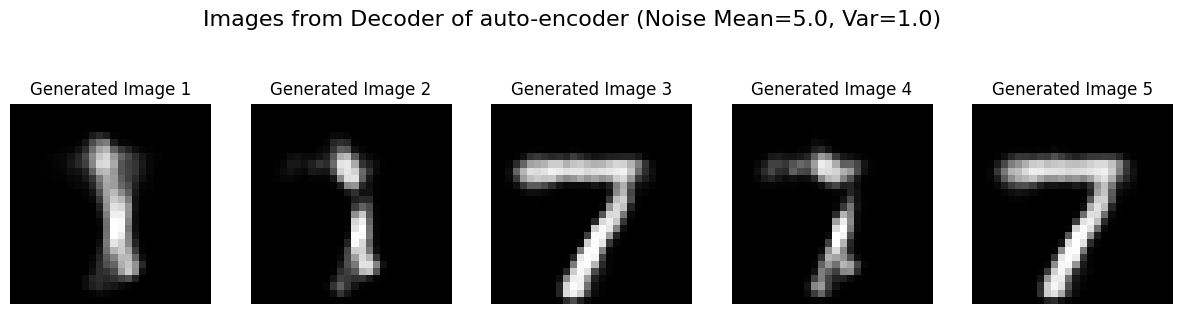

In [7]:
print("\nDisplaying generated images...")
plt.figure(figsize=(15, 4))
for i in range(num_images_to_generate):
    ax = plt.subplot(1, num_images_to_generate, i + 1)
    # The output shape is (28, 28, 1), so we squeeze the last dimension for grayscale plotting
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Generated Image {i+1}")
    plt.axis("off")
plt.suptitle(f"Images from Decoder of auto-encoder (Noise Mean={mean}, Var={variance})", fontsize=16)
plt.show()